In [1]:
import pickle as pkl
import matplotlib.pyplot as plt
import os
import numpy as np


In [2]:
path = "/srv/scratch/anusri/chrombpnet_paper/results/chrombpnet/ATAC/GM12878/"
#universal_transfer=path+"ATAC_10.08.2021_withuniversalbias/with_universal_bias_final_model/unplug/"
#invivo=path+"ATAC_10.09.2021_withinvivobias/final_model_step3/unplug/"
#invivo2=path+"4_4_shifted_ATAC_09.29.2021_bias_filters_500/final_model_step3/unplug/"
#universal_retrain=path+"ATAC_10.11.2021_withuniversalbias_retrain/with_universal_bias_final_model/unplug/"
#universal_transfer=path+"ATAC_10.08.2021_withuniversalbias/with_universal_bias_final_model/unplug/"
#universal_transfer_500filt=path+"ATAC_10.14.2021_withuniversalbias_500filt/with_universal_bias_final_model/unplug/"
universal_transfer=path+"ATAC_10.09.2021_withinvivobias/final_model_step3/unplug/"
#universal_transfer=path+"ATAC_10.14.2021_withinvivobias/final_model_step3/unplug/"
#universal_transfer_500filt=path+"ATAC_10.18.2021_withinvivobias_biasfilts_500/final_model_step3/unplug/"
#universal_transfer_500filt=path+"ATAC_10.18.2021_withinvivobias_biasfilts_128/final_model_step3/unplug/"
#pre_worked_model=path+"4_4_shifted_ATAC_09.29.2021_bias_filters_500/final_model_step3/unplug/"
#pre_worked_model=path+"ATAC_10.09.2021_withinvivobias/final_model_step3/unplug/"
pre_worked_model=path+"4_4_shifted_ATAC_09.21.2021_bias_filters_128/final_model_step3/unplug"

#invivo=path+"ATAC_10.09.2021_withinvivobias/final_model_step3/unplug/"
#invivo2=
#universal_retrain=path+"ATAC_10.11.2021_withuniversalbias_retrain/with_universal_bias_final_model/unplug/"

In [3]:
def load_data(path):
    tn_motif = pkl.load(open(os.path.join(path, "tn5_c_data"), "rb"))
    motif_set = pkl.load(open(os.path.join(path, "gm12878_motifs_set1_data"), "rb"))
    motif_set.extend(pkl.load(open(os.path.join(path, "gm12878_motifs_set2_data"), "rb")))
    return motif_set, tn_motif

In [4]:
universal_transfer_data, univ_tn5_transfer=load_data(universal_transfer)
#universal_transfer_data_500filt, tn5_transfer_500_filt=load_data(universal_transfer_500filt)
pre_worked_model_data, pre_worked_invivo = load_data(pre_worked_model)
#universal_retrain_data, tn5_retrain =load_data(universal_retrain)
#invivo_data, tn5_invivo =load_data(invivo)
#invivo_data2, tn5_invivo2 =load_data(invivo2)

In [5]:
index = [0,1,2,3,4]
#ylims = [0.01, 0.01, 0.01,0.01, 0.01]
ylims = [0.005, 0.005, 0.005,0.005, 0.005]

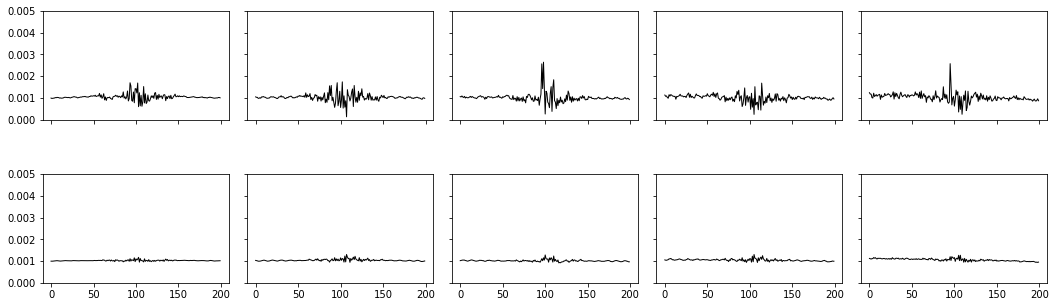

In [6]:
NUM_MODELS=2
num=np.array(univ_tn5_transfer[0]).shape[0]
def plot_tracks(pred_unplug_bias, ax=None, ylim=0.01, start=500-100+5, end=500+100+5 ):
    width = end - start    
    ax.plot(range(width), pred_unplug_bias[:, start:end].mean(0), 'k', linewidth=1, label="corrected")
    ax.set_ylim(0,ylim)  
    
plt.rcParams["figure.figsize"] = (18,5)
fig, axs = plt.subplots(NUM_MODELS,len(index),sharex=True, sharey=True)
for i in range(len(index)):
    idx =index[i]
    plot_tracks(np.array(univ_tn5_transfer[idx]).reshape(num,1000), axs[0,i], ylims[i])
    #plot_tracks(np.array(tn5_transfer_500_filt[idx]).reshape(num,1000), axs[1,i], ylims[i])
    plot_tracks(np.array(pre_worked_invivo[idx]).reshape(num,1000), axs[1,i], ylims[i])
    #plot_tracks(np.array(tn5_invivo[idx]).reshape(num,1000), axs[0,i], ylims[i])
    #plot_tracks(np.array(tn5_transfer[idx]).reshape(num,1000), axs[1,i], ylims[i])
    #plot_tracks(np.array(tn5_retrain[idx]).reshape(num,1000), axs[2,i], ylims[i])
    #plot_tracks(np.array(tn5_invivo2[idx]).reshape(num,1000), axs[3,i], ylims[i])
    
fig.subplots_adjust(wspace=0.1, hspace=0.5)


In [7]:
# gata, tal, gata+tal
#index = [2,4,3]
#ylims = [0.003, 0.003,0.003]
#ctcf, sp1, nfyb, gabpa
#index = [0,1,5,6]
#ylims = [0.02,0.004, 0.003,0.004]

# , ctcf, sp1, nfyb, gabpa, bach, nrf, hnf4g
index = [3,0,1,2]
ylims = [0.005, 0.003,0.004, 0.02]

#index = [4, 5,6,7]
#index = [0,1,2,3]

#ylims = [0.004, 0.003, 0.01,0.003]

17851


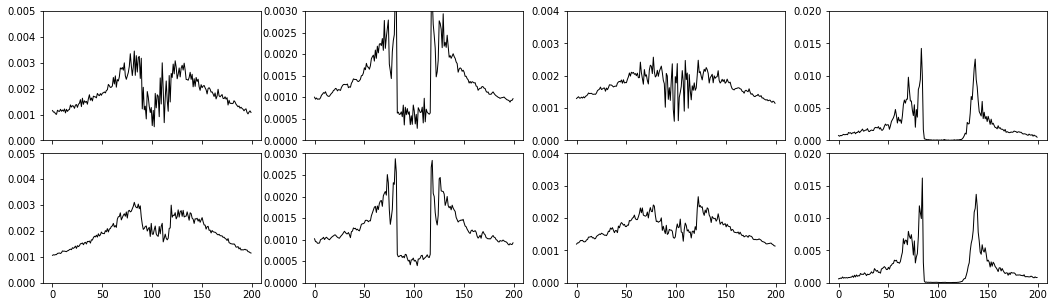

In [8]:
def plot_tracks(pred_unplug_bias, ax=None, ylim=0.01, start=500-100+5, end=500+100+5 ):
    width = end - start
    #ax.plot(range(width), pred_bias[:, start:end].mean(0), 'r', linewidth=1, alpha=0.3, label="uncorrected")
    ax.plot(range(width), pred_unplug_bias[:, start:end].mean(0), 'k', linewidth=1, label="corrected")
    ax.set_ylim(0,ylim)  
    #ax.yaxis.set_ticks([0,0.001,0.002,0.003])
    #ax.legend(

num=np.array(universal_transfer_data[0]).shape[0]
print(num)
plt.rcParams["figure.figsize"] = (18,5)
fig, axs = plt.subplots(2,len(index),sharex=True)

for i in range(len(index)):
    idx =index[i]
    plot_tracks(np.array(universal_transfer_data[idx]).reshape(num,1000), axs[0,i], ylims[i])
    #plot_tracks(np.array(universal_transfer_data_500filt[idx]).reshape(num,1000), axs[1,i], ylims[i])
    plot_tracks(np.array(pre_worked_model_data[idx]).reshape(num,1000), axs[1,i], ylims[i])
    #plot_tracks(np.array(invivo_data[idx]).reshape(num,1000), axs[0,i], ylims[i])
    #plot_tracks(np.array(universal_transfer_data[idx]).reshape(num,1000), axs[1,i], ylims[i])
    #plot_tracks(np.array(universal_retrain_data[idx]).reshape(num,1000), axs[2,i], ylims[i])
fig.subplots_adjust(wspace=0.2, hspace=0.1)

plt.show()